# Visualization

## Housekeeping

In [135]:
# Set working directory
import os
import re

try:
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir('/content/drive/MyDrive/ds1_nhanes/')
except:
  from pathlib import Path
  if not re.search(r'ds1_nhanes$', str(os.getcwd())):
    os.chdir(Path(os.getcwd()).parent)

print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ds1_nhanes


In [136]:
# Load other packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
# Load dataset
df = pd.read_csv('data/clean/nhanes_2017_2023_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19386 entries, 0 to 19385
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19386 non-null  int64  
 1   SEQN                       19386 non-null  int64  
 2   weight_2d                  19386 non-null  float64
 3   grams                      19386 non-null  float64
 4   f_total_(cup_eq)           19386 non-null  float64
 5   f_citmlb_(cup_eq)          19386 non-null  float64
 6   f_other_(cup_eq)           19386 non-null  float64
 7   f_juice_(cup_eq)           19386 non-null  float64
 8   v_total_(cup_eq)           19386 non-null  float64
 9   v_drkgr_(cup_eq)           19386 non-null  float64
 10  v_redor_total_(cup_eq)     19386 non-null  float64
 11  v_redor_tomato_(cup_eq)    19386 non-null  float64
 12  v_redor_other_(cup_eq)     19386 non-null  float64
 13  v_starchy_total_(cup_eq)   19386 non-null  flo

In [138]:
df[['SEQN', 'oz_pbp', 'pf_total_(oz_eq)', 'prop_pbp']].describe()

,SEQN,oz_pbp,pf_total_(oz_eq),prop_pbp
count,19386.000000,19386.000000,19386.000000,18877.000000
mean,123798.132054,3.607962,10.380507,0.248736
std,10059.760136,6.382678,8.096582,0.285101
min,109263.000000,0.000000,0.000000,0.000000
25%,115314.250000,0.000000,4.810000,0.000000
50%,121282.500000,0.870000,8.690000,0.134887
75%,133658.750000,4.580000,13.860000,0.444676
max,142310.000000,79.110000,100.960000,1.000000


## PBP Consumption

Big caveat here is that we are comparing the ounces of PBPs consumed to the ounces of total proteins consumed, and these are probably definitely not the same thing. At some point we should probably pull grams of protein from the NHANES data rather than using the FPED as our basis of comparison on PBP consumption.

Set a common theme for our plots:

In [139]:
sns.set_theme(
    style="ticks",
    rc= {
      "axes.spines.right": False,
      "axes.spines.top": False,
      "figure.figsize": (6, 6)
    }
  )

Proportion of PBP consumption out of total protein consumption by gender. Note that we are using the 2-day weights

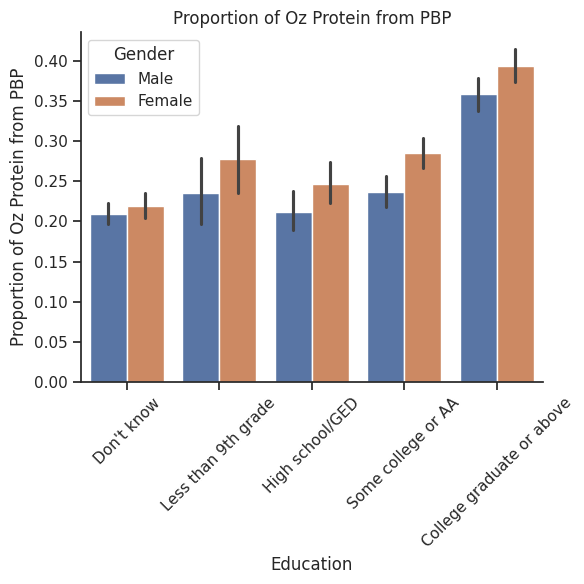

In [140]:
# prop pbp consumption by gender
ax = sns.barplot(
  data=df,
  y='prop_pbp',
  x='education',
  hue='gender',
  order=[
    "Don't know",
    'Less than 9th grade',
    'High school/GED',
    'Some college or AA',
    'College graduate or above'
  ],
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  ylabel = 'Proportion of Oz Protein from PBP',
  xlabel = 'Education',
  title = 'Proportion of Oz Protein from PBP'
)
ax.legend(title='Gender')
plt.xticks(rotation=45)

# Save plot
plt.tight_layout()
plt.savefig('outputs/checkin_1/pbp_by_education.png')

plt.show()
# Would like to adjust names horizontally to line up better after rotation, hjust arg?

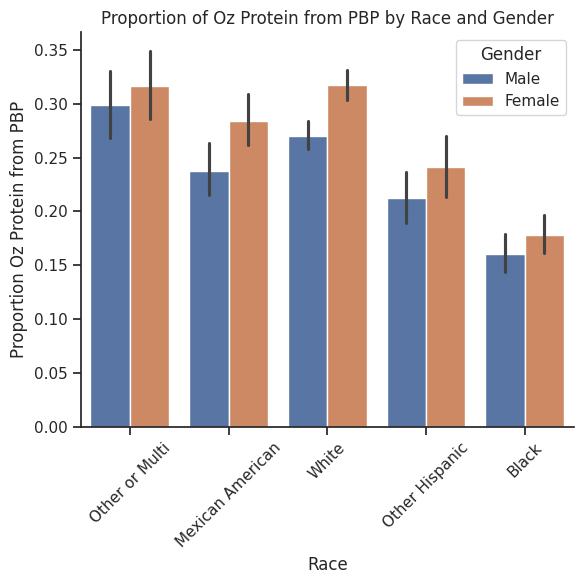

In [141]:
# pbp consumption by race
ax = sns.barplot(
  data=df,
  y='prop_pbp',
  x='race',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95)
)
ax.set(
  xlabel = 'Race',
  ylabel = 'Proportion Oz Protein from PBP',
  title = 'Proportion of Oz Protein from PBP by Race and Gender'
)
ax.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_by_race.png')

# Show it
plt.show()

In [142]:
df['income_ratio_qs']

,income_ratio_qs
0,High
1,Lowest
2,High
3,Highest
4,Low
...,...
19381,Low
19382,Medium
19383,NaN
19384,High


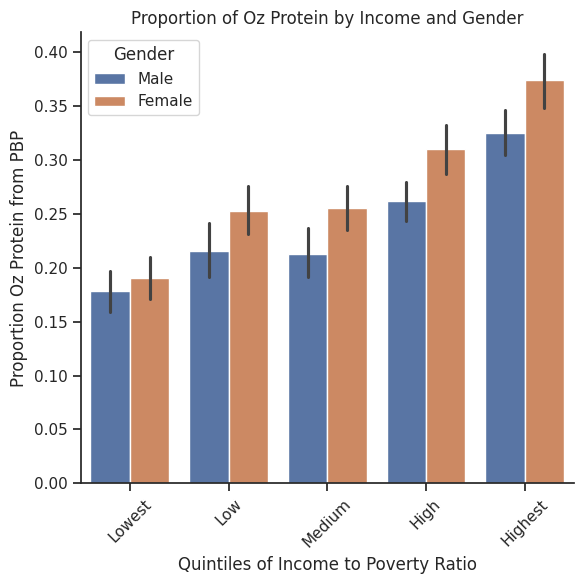

In [143]:
# pbp consumption by poverty ratio
ax = sns.barplot(
  data = df,
  y='prop_pbp',
  x='income_ratio_qs',
  hue='gender',
  weights='weight_2d',
  errorbar=('ci', 95),
  order=[
      'Lowest',
      'Low',
      'Medium',
      'High',
      'Highest'
  ]
)
ax.set(
  xlabel = 'Quintiles of Income to Poverty Ratio',
  ylabel = 'Proportion Oz Protein from PBP',
  title = 'Proportion of Oz Protein by Income and Gender'
)
ax.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()

# Save it
plt.savefig('outputs/checkin_1/pbp_by_income.png')

# Show it
plt.show()

## Test a Table

Just figuring out how to make a LaTeX table

In [144]:
# Make a smaller DF to play around with
small_df = df[['SEQN', 'weight_2d', 'gender', 'prop_pbp']].head()
print(small_df)

     SEQN  weight_2d  gender  prop_pbp
0  109263    8904.03    Male  0.242092
1  109264    3626.88  Female  0.037090
2  109265   17806.00    Male  0.004137
3  109266    2994.10  Female  0.360656
4  109269    9115.96    Male  0.000000


In [145]:
# Rename columns to ditch underscores
small_df.columns = ['SEQN', 'Weight', 'Gender', 'Prop PBP']
print(small_df)

     SEQN    Weight  Gender  Prop PBP
0  109263   8904.03    Male  0.242092
1  109264   3626.88  Female  0.037090
2  109265  17806.00    Male  0.004137
3  109266   2994.10  Female  0.360656
4  109269   9115.96    Male  0.000000


In [146]:
small_df.to_latex(
  'outputs/checkin_1/test_table.tex',
  index=False,
  float_format="%.2f",
  label='test_table',
  caption='This is a test table',
  position='h'
)
